In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sktime.transformations.panel.dictionary_based import PAAlegacy



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sktime.transformations.compose import FitInTransform
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sktime.transformations.panel.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
def load_npy(filename):
    return np.load(filename)

In [3]:
dir_path = 'time_series/'
len_threshold = 1280

In [4]:
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-1]) # genre
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [5]:
X.shape, y.shape

((10000, 1, 1280), (10000,))

In [6]:
# these (or any other) numpy arrays can be also saved as npy files (for subsequent reloading)
np.savez('X_y_ids', X, y, ids)

# reload
X_y_ids = load_npy('X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [7]:
# Prima di tutto, riformatta X per avere una forma 2D adatta a un DataFrame
X_reshaped = X.reshape(X.shape[0], X.shape[2])

# Creare il DataFrame
df = pd.DataFrame(X_reshaped)
df['Genre'] = y
df['Track_ID'] = ids

# Reorganizzare le colonne per avere Track_ID e Genre all'inizio
cols = df.columns.tolist()
cols = cols[-1:] + cols[-2:-1] + cols[:-2]
df = df[cols]

df

,Track_ID,Genre,0,1,2,3,4,5,6,7,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,002qpSULhHAw6DGqFxbaO1,happy.np,4033.983233,4452.531825,4493.084636,4205.104114,4124.152380,4374.528603,4218.922430,4811.479415,...,4206.281841,3996.986027,4136.007023,4515.116157,4272.059542,3179.082991,3119.379434,3163.797698,3135.170030,3470.557808
1,004h8smbIoAkUNDJvVKwkG,emo.np,1246.782278,1275.037576,1389.825458,1425.923045,1453.146435,1439.394669,1446.677260,1452.278668,...,845.854602,892.718608,945.693979,2427.495847,4272.999098,4756.297360,3155.547176,2652.793629,2693.680737,2600.652552
2,006ATYzgynEKIPgVaT5LQM,world-music.np,556.527371,570.688219,632.791952,724.284541,700.265785,637.978949,580.044365,541.837395,...,685.950471,703.702623,651.783128,600.108454,568.681377,537.072023,536.968066,549.719850,575.656227,565.242703
3,00C93bsNIjHStKvr1lPJee,heavy-metal.np,2318.553884,2415.404641,2587.678594,2679.752782,2476.585990,2354.537616,2351.667896,2319.100690,...,2465.254007,2486.160195,2369.967771,2435.225332,2516.305110,2457.247966,2398.038946,2382.307384,2390.305834,2520.164300
4,00CsDW3I9XueUvaXnAvGMm,progressive-house.np,2197.095845,2299.780004,2340.115366,2230.133271,2162.143986,2060.925716,2085.023936,2122.772450,...,2159.847299,1995.486309,1884.790511,2036.814810,2283.750682,2403.766504,2551.391082,2413.472908,2248.364802,2249.086879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7zmbtfKgZMTQ1GlqBno5T5,synth-pop.np,2714.675059,2273.567285,1794.152523,1461.596435,1486.842231,1576.816447,1656.734425,1676.028261,...,2756.124353,2687.478162,2771.815674,2639.636103,2594.053748,2520.841825,2592.052944,2631.374097,2830.008571,2531.497095
9996,7zP20CANb26S52imHKKWEc,piano.np,618.054847,620.631310,612.652137,636.176379,635.752477,631.399916,605.110771,626.046116,...,540.520738,534.479515,548.647430,551.268466,539.168279,529.838171,567.515093,588.830356,559.373196,558.468585
9997,7zvGj5jjRIBRqT82crTMVf,world-music.np,2302.092948,2354.562900,2498.050464,2485.572104,2368.360732,2397.476901,2450.164601,2463.453644,...,1887.290012,1401.135311,1490.870560,2057.341857,2309.620417,2334.191132,2324.397193,2277.928664,2288.184316,2237.393099
9998,7zwddyEol0Hg5K8HQd3srX,sleep.np,277.987301,284.186192,294.089063,290.958406,289.316498,298.456330,300.274822,299.111098,...,287.362820,287.743691,288.714580,285.405406,281.218507,277.622963,295.527480,286.623827,276.994329,260.720517


ELIMINO I DUPLICATI

In [8]:
df = df.drop_duplicates()
duplicati = df[df.duplicated(subset=['Track_ID'], keep=False)]
duplicati_ordinati = duplicati.sort_values(by='Track_ID')
# elimino di duplicati in base all'id
df = df.drop_duplicates(subset=["Track_ID"])

### MISSING VALUE

In [9]:
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

Total missing values: 0


### DISTRIBUZIONE DELLE FREQUENZE

In [10]:
#non so quanto abbia senso fare la distribuzione delle frequenze delle ts 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,...,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,2094.771696,2103.353870,2113.544849,2099.284290,2107.730357,2134.710746,2157.021265,2157.212908,2151.308965,2173.543469,...,2144.817168,2157.458285,2150.500298,2140.115477,2127.282212,2127.657888,2140.006237,2149.760399,2121.060004,2054.207546
std,918.326150,919.468455,930.640650,945.410864,964.110715,973.256807,977.416229,979.615715,980.254622,978.850907,...,1024.228923,1033.392192,1029.411776,1021.303560,1008.794330,1009.307370,1014.862168,1022.367499,1020.485722,1013.762672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1469.399500,1471.511451,1467.258660,1426.956389,1418.534827,1434.823165,1471.291549,1470.351605,1470.642247,1496.983067,...,1416.469306,1434.784242,1426.026769,1416.979185,1408.758965,1405.087343,1410.791788,1420.849130,1392.666149,1316.331985
50%,2095.237636,2100.260963,2114.043507,2089.618732,2091.951989,2116.927073,2154.620358,2158.287273,2136.483842,2158.865570,...,2124.701750,2132.175783,2118.898695,2112.978269,2111.801302,2113.726317,2125.752838,2129.144735,2090.229602,2010.361686
75%,2689.550292,2697.231677,2733.580942,2727.782933,2734.760360,2762.707963,2796.027091,2788.559653,2771.841014,2786.091879,...,2783.555220,2786.379117,2783.575201,2768.304520,2755.323806,2760.946302,2776.035079,2784.485255,2756.476039,2672.823011
max,8121.858964,8050.881901,7816.026323,7431.098498,7282.628953,7104.967570,7011.074341,6955.676362,7076.525400,7180.547688,...,7187.324965,7775.960055,8064.994752,7954.447550,7055.635750,7264.327658,7280.543301,7725.208624,7739.289713,7354.363784


### APPROSSIMAZIONE

In [11]:
def approximate(ts, approx):
    return approx.fit_transform(ts)

In [12]:
paa = PAAlegacy(num_intervals=100) # Piecewise Aggregate Approximation w. 100 intervals

In [13]:
X_paa = np.array([[approximate(ts[0], paa)[:,0]] for ts in X])
X_paa.shape

(10000, 1, 100)

In [14]:
y = LabelEncoder().fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 1, 1280), (2000, 1, 1280), (8000,), (2000,))

In [16]:
df = pd.DataFrame(np.squeeze(X_train))
df["genre"] = y_train

In [17]:
df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,2955.912519,3101.818477,3272.584293,3380.281979,3608.045816,3431.920391,3085.475347,2751.071083,2535.501991,2575.349922,...,3006.836347,2986.229993,3230.841796,3768.076261,3952.493799,3832.393961,3727.874208,3393.486798,3263.792289,14
1,1891.299674,1934.663056,2018.139162,1998.645078,1902.759073,1954.180303,2163.638460,2324.297996,2343.694475,2151.769747,...,2287.897476,2363.627150,2394.340551,2308.740740,2230.216541,2341.804537,2375.369200,2351.789632,2317.908739,11
2,1972.494343,1833.747381,1676.429118,1725.657584,1886.338926,1772.776093,1296.888940,2416.433847,3969.635581,4014.269826,...,3154.592147,4212.395613,4400.720917,3969.429351,3378.385107,2948.468921,2712.052937,2552.563638,2458.993549,0
3,2984.122135,2992.731940,2903.830742,2749.692814,2628.280025,2431.206178,2443.903613,2403.450923,2454.202428,2405.800163,...,2156.651609,2136.408632,2077.113992,2105.033114,1995.994525,1872.212448,1879.018588,1952.018141,2057.256236,19
4,2302.698345,2537.538658,2519.379277,2508.865911,2447.543056,2571.939704,2780.549847,2686.454643,2200.980015,1741.450521,...,1822.564272,1582.171144,1707.074587,2031.385335,2332.016193,2515.244486,2683.657134,2707.170535,2539.566622,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,929.874693,960.028276,1030.015266,1041.026104,928.305027,826.568171,1551.297211,2085.227500,1864.450935,1103.600740,...,1032.818836,1079.808589,1178.176386,1205.168427,1117.349446,1028.626959,1097.367867,1200.194695,1196.999265,1
7996,1716.297919,1585.884061,1446.057173,1323.666136,1280.243960,1294.675013,1276.656775,1288.481636,1255.873359,1261.053687,...,2609.515122,2598.612488,2456.212336,2438.158680,2514.074171,2477.775104,3067.430210,3739.774389,4263.972313,18
7997,2722.969644,2661.120420,2826.980805,2736.058792,2760.857507,2852.976711,2767.084710,2523.090652,2334.532227,2320.110688,...,2984.177712,2844.766267,2704.859565,2261.173705,2260.587493,2561.577614,2611.320413,2685.421966,2547.152376,4
7998,641.372840,624.418843,665.798004,666.853608,748.189624,774.508406,788.673935,773.888356,752.636084,659.688190,...,653.826172,668.146598,657.257989,650.770458,637.973278,626.609102,625.983430,647.151310,660.318979,1


In [18]:
df_filtered = df[df['genre'].isin([1, 10, 12])] 
df_melt = df_filtered.melt(value_name="observation", var_name="time", id_vars="genre")

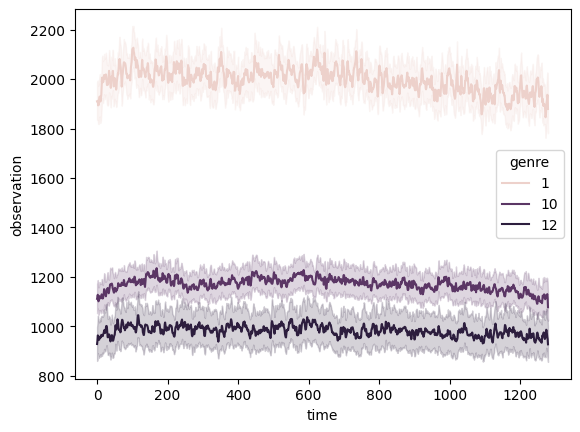

In [19]:
sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="genre")
plt.show()

CLASSIFICATION

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 1, 1280), (2000, 1, 1280), (8000,), (2000,))

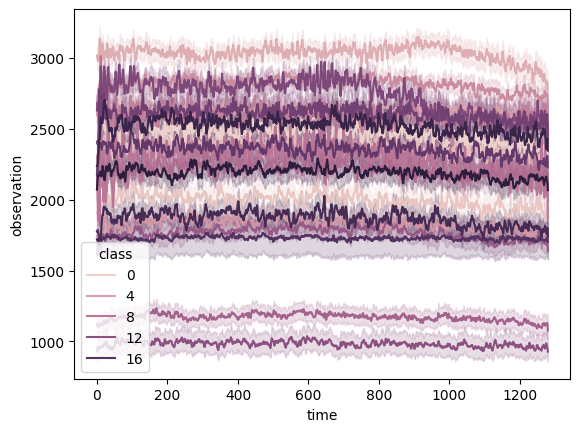

In [21]:
df = pd.DataFrame(np.squeeze(X_train))
df["class"] = y_train
df_melt = df.melt(value_name="observation", var_name="time", id_vars="class")
sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="class")
plt.show()

NORMALIZATION

In [46]:
scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

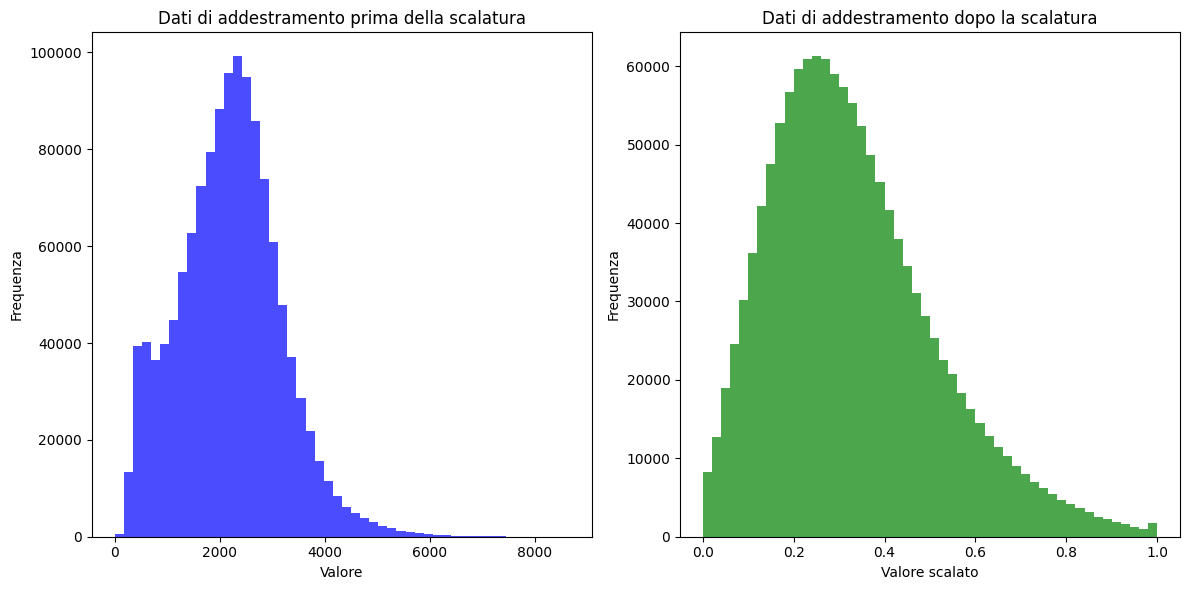

In [47]:
import matplotlib.pyplot as plt

# Plot dei dati di addestramento prima e dopo la scalatura
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Dati di addestramento prima della scalatura')
plt.xlabel('Valore')
plt.ylabel('Frequenza')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Dati di addestramento dopo la scalatura')
plt.xlabel('Valore scalato')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()


CLASSIFICATION

KNN

In [48]:
from sklearn.metrics import classification_report
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

Ho provato diversi valori di n_neighbors ma non sono riuscito a ottenere risultati migliori di quelli ottenuti con il classificatore di base.

In [49]:
from tslearn.metrics import dtw as tsldtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [50]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw")

In [36]:
X_train_scaled_subset = X_train_scaled[:10]
y_train_subset = y_train[:10]

# Fit the model on the subset
knn.fit(X_train_scaled_subset, y_train_subset)

# Predict the labels of the test data
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

SHAPELET

In [29]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

In [30]:
st = ShapeletTransformClassifier()

In [51]:
%%time
st.fit(X_train_scaled, y_train)
y_pred = st.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 